In [1]:
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from gqn_dataset import GQNDataset, Scene, transform_viewpoint, sample_batch, GQNDataset_pdisco

In [2]:
train_data_dir = "/home/mprabhud/dataset/shapenet_renders/npys/split_allpt.txt"

In [3]:
train_dataset = GQNDataset_pdisco(root_dir=train_data_dir, target_transform=transform_viewpoint)

In [4]:
train_dataset[0][1][1]

tensor([ 5.3157, -2.7362, -5.3157,  0.9397, -0.3420,  1.0000,  0.0000])

In [5]:
data  = []

with open(train_data_dir) as f:
    lines = f.readlines()
    
    for line in lines:
        data.append(line.split()[0])
        
all_files = [os.path.join(os.path.dirname(train_data_dir),f) for f in data if f.endswith(".p")]

In [6]:
train_loader = DataLoader(train_dataset, batch_size=36, shuffle=True)

In [7]:
for b in train_loader:
    x_data, v_data, metadata = b
    break


In [8]:
x_data.shape

torch.Size([36, 24, 64, 64, 3])

In [9]:
x, v, x_q, v_q, context_idx, query_idx = sample_batch(x_data, v_data, "Shepard-Metzler")

In [11]:
x_q.shape

torch.Size([36, 64, 64, 3])

In [17]:
x_data.shape

torch.Size([36, 24, 64, 64, 3])

In [1]:
x_data = x_data.numpy()

NameError: name 'x_data' is not defined

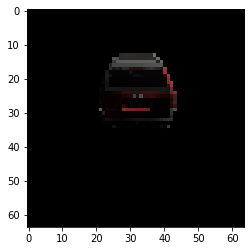

In [15]:
plt.imshow(x_data[12][6])

In [49]:
x.shape

torch.Size([36, 10, 64, 64, 3])

In [50]:
x.permute(0,1,4,2,3).shape

torch.Size([36, 10, 3, 64, 64])

In [51]:
x_q.permute(0,3,1,2)

torch.Size([36, 3, 64, 64])

In [54]:
x_q = x_q.numpy()

In [1]:
plt.imshow(x[0][4])

NameError: name 'plt' is not defined

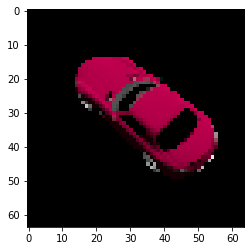

In [57]:
plt.imshow(x_q[0])

In [56]:
x_q.shape

(36, 64, 64, 3)

tensor([-2.8284e+00, -6.9282e+00,  2.8284e+00, -5.0000e-01,  8.6603e-01,
        -1.0000e+00, -8.7423e-08])

In [60]:
import torch